In [172]:
# Assigment 3
# Determining and removing drawbacks of exponential and running mean. Task 1

# Team 6: Berman Vladimir, Dronova Maria, Bazhenov Artem, Skoltech, October, 2022

# Initialisation of libraries 
import numpy as np
import matplotlib.pyplot as plt

In [173]:
# PART 1. Backward exponential smoothing 

In [174]:
# Setting the function for forward exponential smoothing
def exp_smooth(alp, arr):
    dub = np.array(arr)
    for i in range(1, len(arr)):
        dub[i] = dub[i - 1] + alp * (dub[i] - dub[i - 1])
    return dub

In [175]:
# Setting the function for backward exponential smoothing
def backward_exp_smooth(alp, arr):
    dub = np.array(arr)
    for i in range(len(arr) - 2, -1, -1):
        dub[i] = dub[i + 1] + alp * (dub[i] - dub[i + 1])
    return dub

In [176]:
# Setting the function for running mean
def mean_smooth(wind, arr):
    dub = np.array(arr)
    for i in range((wind - 1) // 2 , len(dub) - (wind - 1) // 2):
        dub[i] = np.mean(dub[i - (wind - 1) // 2 : i + (wind - 1) // 2])
    return dub

In [177]:
# Setting the function for deviation idicator
def deviation_indicator(arrz, arrx):
    return sum(np.square(arrz - arrx))

In [178]:
# Setting the function for variability idicator
def variability_indicator(arr):
    summ = 0
    for i in range(len(arr) - 2):
        summ = summ + (arr[i + 2] - 2 * arr[i + 1] + arr[i]) ** 2
    return summ

In [179]:
# Setting the function for generating velocity and acceleration
def gnerate_vel_and_ac(exp, var, T, V0, numb):
    arr = np.zeros(numb)
    arr[0] = V0
    a = np.random.normal(exp, var ** 0.5, numb)
    for i in range(1, len(arr)):
        arr[i] = arr[i - 1] + a[i - 1] * T
    return arr, a

In [180]:
# Setting the function for generating coordinates
def generate_x(T, X0, a, v):
    arr = np.zeros(len(a))
    arr[0] = X0
    for i in range(1, len(a)):
        arr[i] = arr[i - 1] + v[i - 1] * T + a[i - 1] * (T ** 2) / 2
    return arr

In [181]:
# PART 1. Backward exponential smoothing 
x0 = 10 #initial condition

sigmaw_2 = 28 ** 2 # variance of unbiased random noise 

# setting size of true trajectory
x = np.ones(300)

# genration of normal noise
w = np.random.normal(0, sigmaw_2 ** 0.5, 300)

# generation of true trajectory 
x[0] = x0 + w[0]
for i in range(1,300):
    x[i] = x[i - 1] + w[i]

sigmaeta_2 = 97 ** 2  # standard deviation of measurement noise

z = np.ones(300) # setting amount of measurements

# genration of normal noise
eta = np.random.normal(0, sigmaeta_2 ** 0.5, 300)

# genration of measurements
z[0] = x[0] + eta[0]
for i in range(1,300):
    z[i] = z[i - 1] + eta[i]

In [182]:
# Calculating window size M and smoothing constant alpha
hi = sigmaw_2 / sigmaeta_2
alp = (-hi + np.sqrt(hi ** 2 + 4 * hi)) / 2
M = round((2 - alp) / alp)
print('Smoothing constant =', alp)
print('Window size =', M)

Smoothing constant = 0.24998861233121078
Window size = 7


Text(0.5, 1.0, 'Graph 1\nComparison of running mean and backward exponential smoothing')

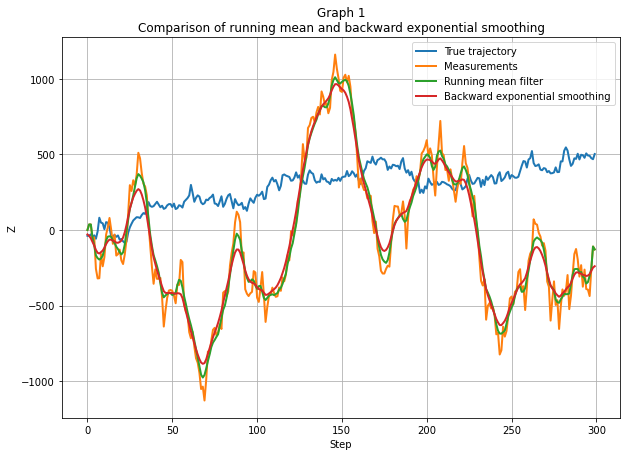

In [183]:
plt.figure(figsize=(10, 7))
plt.plot(x, linewidth = 2)
plt.plot(z, linewidth = 2)
plt.plot(mean_smooth(M, z), linewidth = 2)
plt.plot(backward_exp_smooth(alp, exp_smooth(alp, z)), linewidth = 2)
plt.grid()
plt.ylabel('Z')
plt.xlabel('Step')
plt.legend(['True trajectory', 'Measurements', 'Running mean filter', 'Backward exponential smoothing'])
plt.title('Graph 1\nComparison of running mean and backward exponential smoothing')

In [184]:
print('Deviation indicator for backward exponential smoothing =', deviation_indicator(z, backward_exp_smooth(alp, exp_smooth(alp, z))))
print('Deviation indicator for running mean =',deviation_indicator(z, mean_smooth(M, z)))

Deviation indicator for backward exponential smoothing = 2935835.4442213075
Deviation indicator for running mean = 1760640.586913677


In [185]:
print('Variability indicator for backward exponential smoothing =',variability_indicator(mean_smooth(M, z)))
print('Variability indicator for running mean =',variability_indicator(backward_exp_smooth(alp, exp_smooth(alp, z))))

Variability indicator for backward exponential smoothing = 183941.7786551189
Variability indicator for running mean = 20291.606340600505


In [186]:
# As we can see from graph1 and deviation indicator running mean gives as graph that 
# is closer to the measurements than the one after backward smoothing. However, that 
# is not always a good result bacause in this particular situation we see a lot of
# noise, therefore it is better to have mostly smothed graph rather than the one that
# is closer to the noisy trajectory. It applies to the variability indicator too: if 
# we do not know the rate of change of the process then we better choose the running mean.

In [187]:
# PART 2. Drawbacks of running mean 
# First trajectory
# initial conditions
x0 = 5 
v0 = 0 
T = 0.1
sigmaa_2 = 10 # variance of noise
numb = 300 # amount of points 
v,a = gnerate_vel_and_ac(0, sigmaa_2 ** 0.5, T, v0, numb) # generating velocity and acceleration
x = generate_x(T, x0, a, v) # generating measurements 

In [188]:
sigmaeta_2 = 500 # variance of random noise
eta = np.random.normal(0, sigmaeta_2 ** 0.5, 300) # generating random noise 
z = x + eta # generating measurements

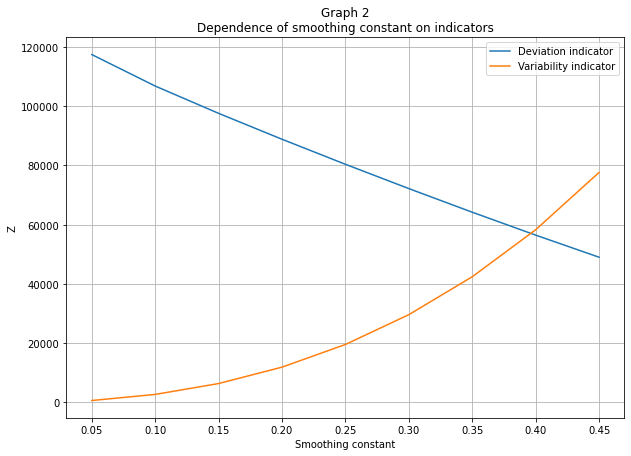

Text(0.5, 1.0, 'Graph 4\nOptimal running mean and exponential smoothing')

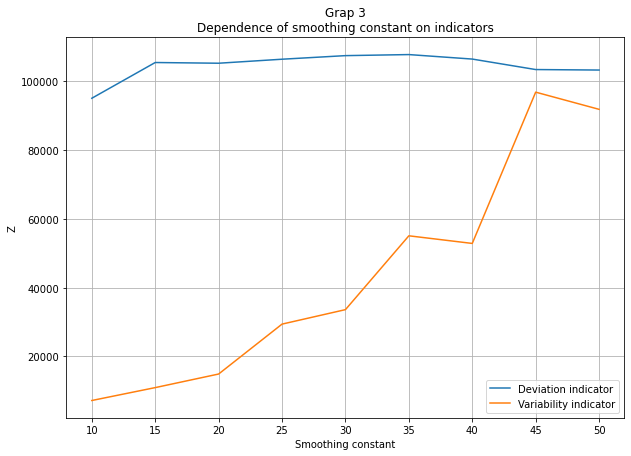

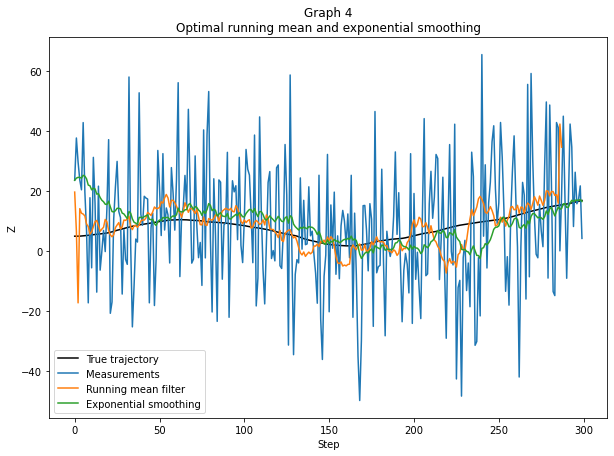

In [204]:
# Ploting the graph of dependence of the smoothing constant and
# window size on the deviation and variability indicators in order
# to determine the best estimation of the process. 
# It is better to have both the deviation and variability idicators
# as small as possible but these are mutually exclusive situations, 
# since proximity to a noisy trajectory entails more variability.

# Setting the interval for the window size and smoothing constant
alp = np.arange(0.05, 0.5, 0.05)
M = np.arange(10, 55, 5)
var_alp = []
dev_alp = []
var_M = []
dev_M = []
for i in range(len(M)):
    dev_alp.append(deviation_indicator(z, exp_smooth(alp[i], z)))
    var_alp.append(variability_indicator(exp_smooth(alp[i], z)))
    dev_M.append(deviation_indicator(z, mean_smooth(M[i], z)))
    var_M.append(variability_indicator(mean_smooth(M[i], z)))

plt.show()
plt.figure(figsize=(10, 7))
plt.plot(alp, dev_alp)
plt.plot(alp, var_alp)
plt.grid()
plt.ylabel('Z')
plt.xlabel('Smoothing constant')
plt.legend(['Deviation indicator', 'Variability indicator'])
plt.title('Graph 2\nDependence of smoothing constant on indicators')

plt.show()
plt.figure(figsize=(10, 7))
plt.plot(M, dev_M)
plt.plot(M, var_M)
plt.grid()
plt.ylabel('Z')
plt.xlabel('Window size')
plt.legend(['Deviation indicator', 'Variability indicator'])
plt.title('Grap 3\nDependence of smoothing constant on indicators')

# From the graph 2 we can see the decrease of deviation indicator
# with increasing smoothing constant. Graph 3 shows no significan
# change in deviation indicator due to the fact that firsly with 
# smaller window size enire graph is rather noisy and with bigger
# one graph in the center is smoothed but on the ends where the 
# filter stops working it is quite abrupt. 
# Now we have to keep in mind that since we are analyzing the 
# process which rate of change is changed insignificantly and 
# measurement noise is great then we have to smooth the graph a lot
# in order to be as close to line as possible and get rid of noise.
# Hence the conclusion that we need a large window size and little 
# smoothing consant regardles of the optimal point on the graph.
# But as was said before, bigger wind size comes with uncleared
# noise on the ends of the graphs so it is better to choose some 
# value in the middle of our interval, for example M = 20. 
# What comes to smoothing constant, it is better to take 
# closer to the smallest ones, for example alha = 0.05.

# Plotting graphs with optimal M and alpha 
M = 20
alp = 0.05
plt.figure(figsize=(10, 7))
plt.plot(x, color = 'black')
plt.plot(z)
plt.plot(mean_smooth(M, z)[6:len(z) - 6])
plt.plot(exp_smooth(alp, z),)
plt.ylabel('Z')
plt.xlabel('Step')
plt.legend(['True trajectory', 'Measurements', 'Running mean filter','Exponential smoothing'])
plt.title('Graph 4\nOptimal running mean and exponential smoothing')

In [193]:
# checking the proximity to the true trajectory
print(np.std(mean_smooth(M, z)[6:len(z) - 6] - x[6:len(z)-6]))

19.12187937837268
4.840776537612565


Text(0.5, 1.0, 'Graph 5\nRunning mean filer for cyclic process')

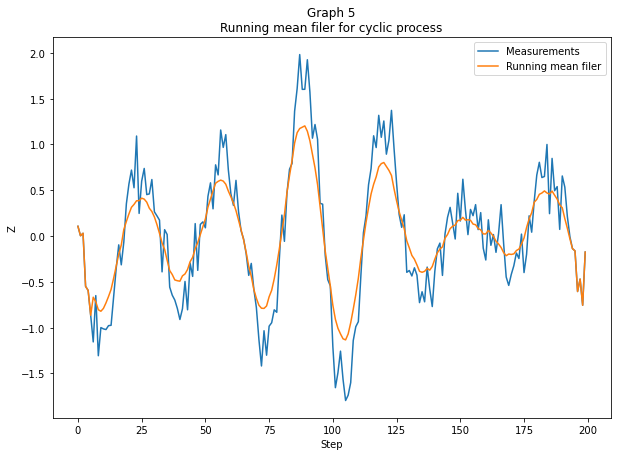

In [205]:
# Second trajectory
# initial conditions
A0 = 1
A = np.zeros(200)
x_sin = np.zeros(200)
sigmaw_2 = 0.08 ** 2
T = 32

w = np.random.normal(0, sigmaw_2 ** 0.5, 200) # generating random normal noise

# Amplitude generation
A[0] = A0 + w[0]
for i in range(1, len(A)):
    A[i] = A[i - 1] + w[i]
    
# Angular velocity
omeg = 2 * np.pi / T

# Generating cyclic trajectory 
for i in range(len(x_sin)):
    x_sin[i] = A[i] * np.sin(omeg * i + 3)

# Generating measurements with noise      
nu_sin = np.random.normal(0, 0.05 ** 0.5, 200)
z_sin = x_sin + nu_sin

# Ploting running mean filter graph
plt.figure(figsize=(10, 7))
plt.plot(z_sin)
plt.plot(mean_smooth(13, z_sin))
plt.ylabel('Z')
plt.xlabel('Step')
plt.legend(['Measurements', 'Running mean filter'])
plt.title('Graph 5\nRunning mean filter for cyclic process')

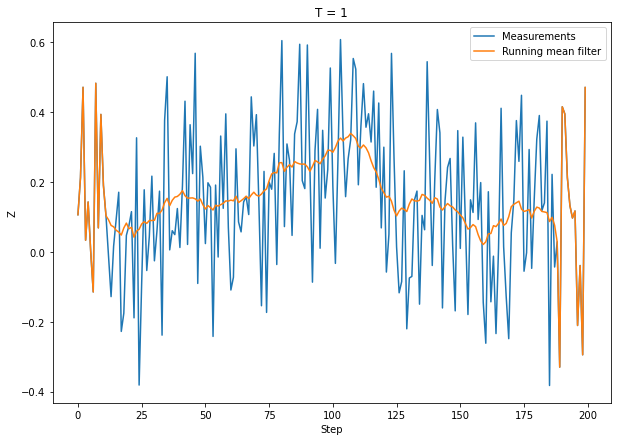

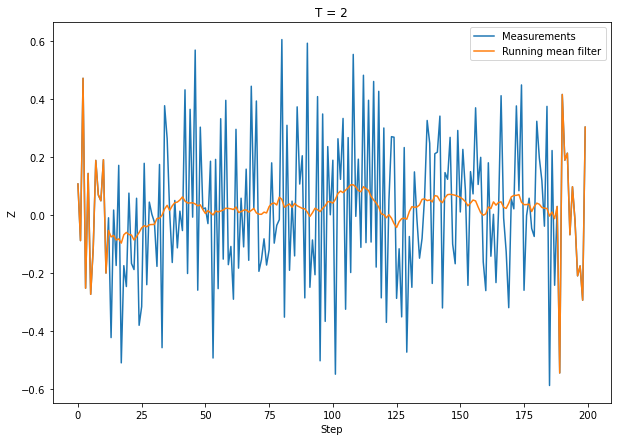

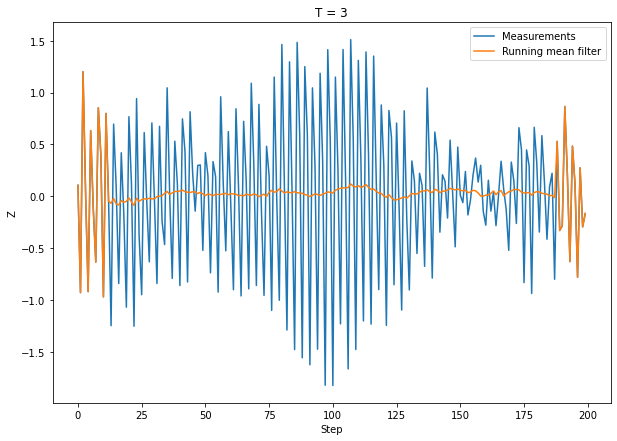

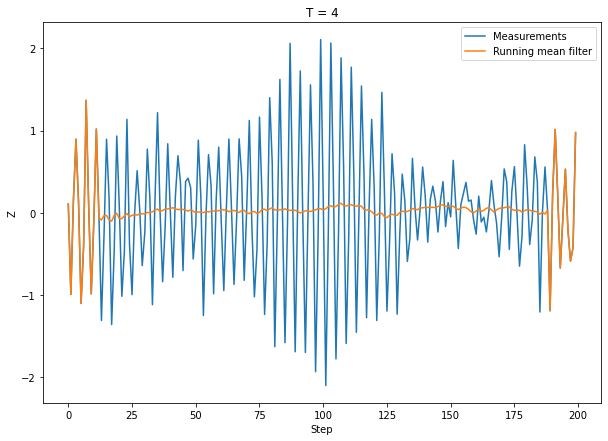

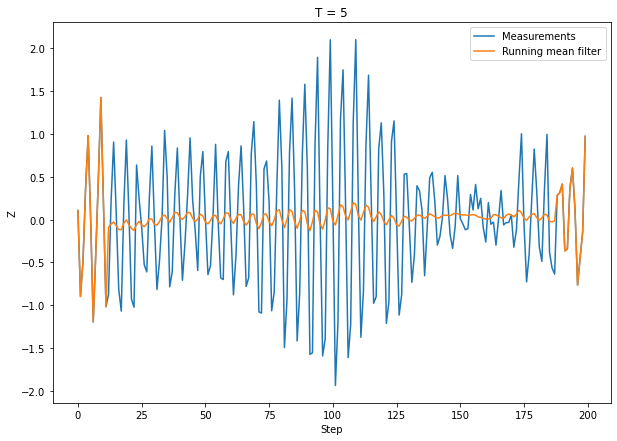

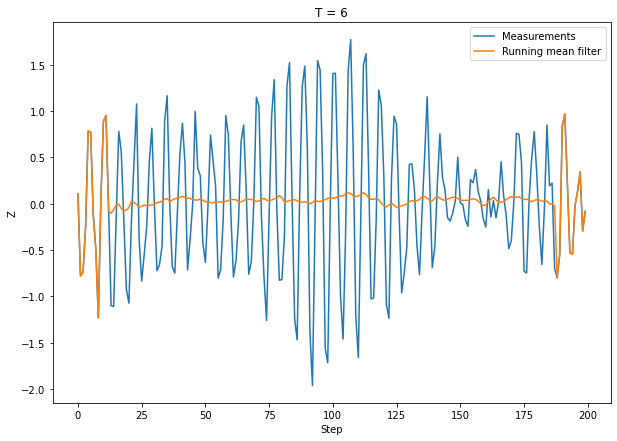

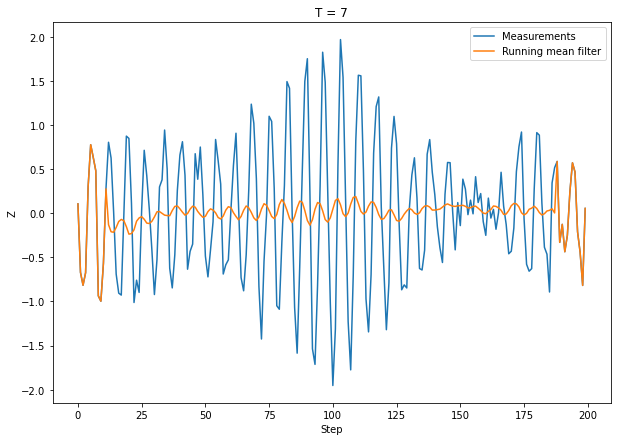

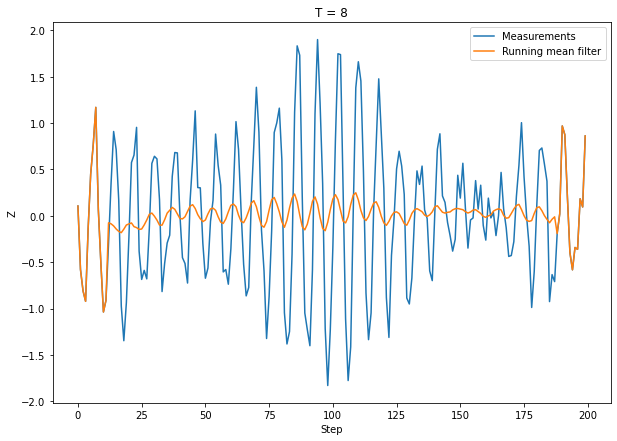

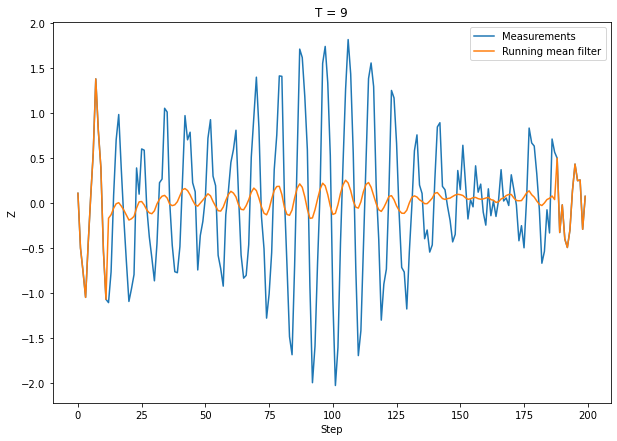

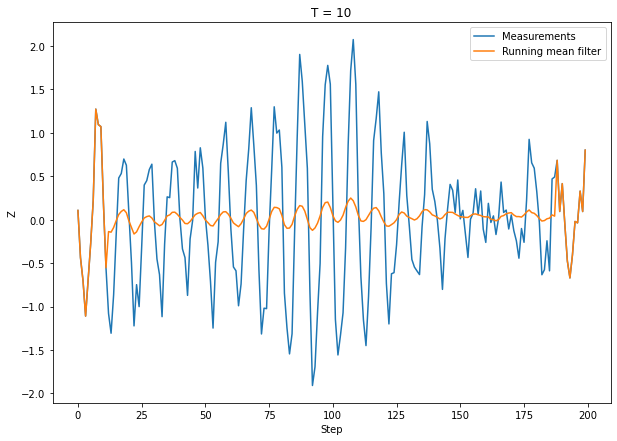

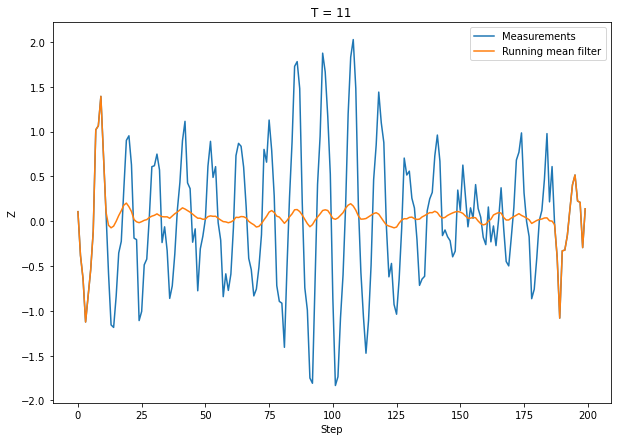

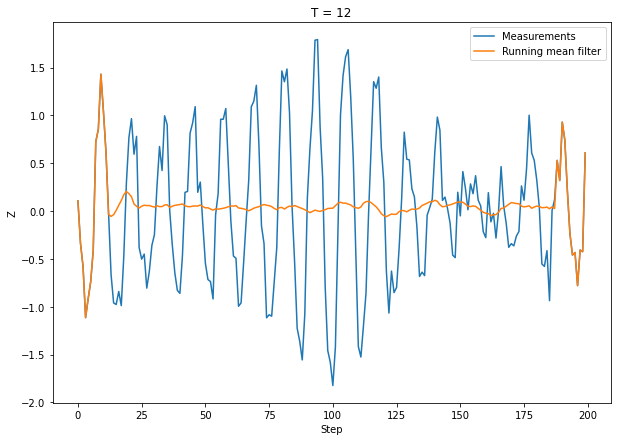

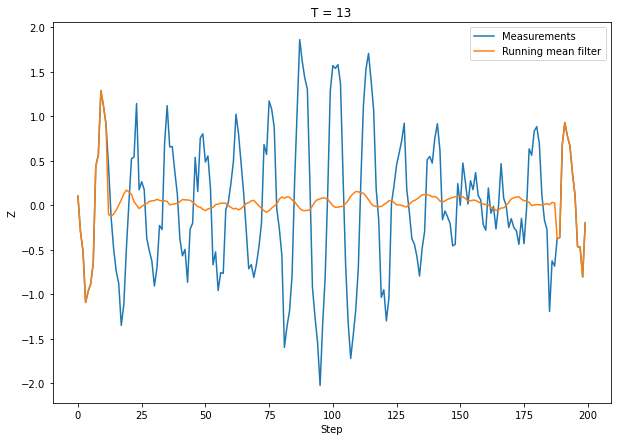

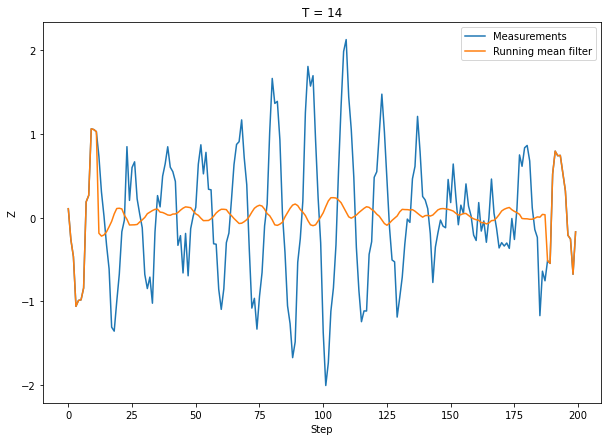

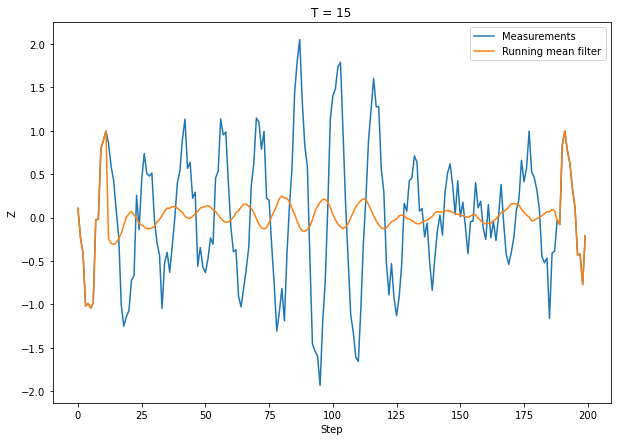

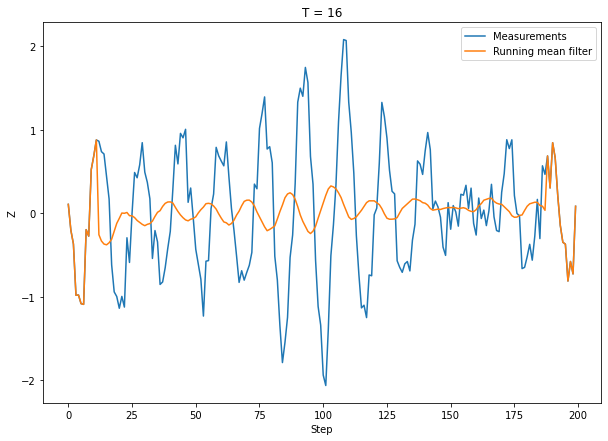

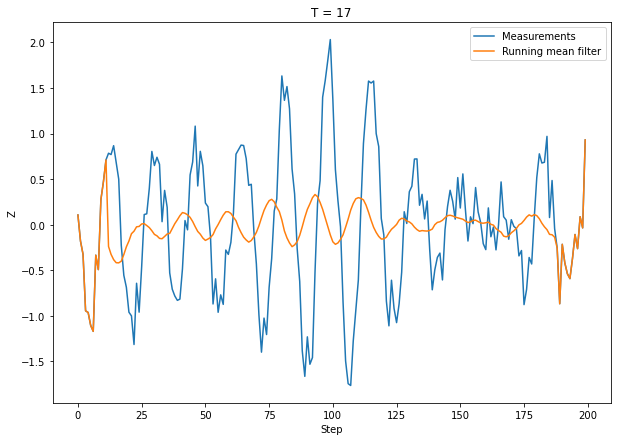

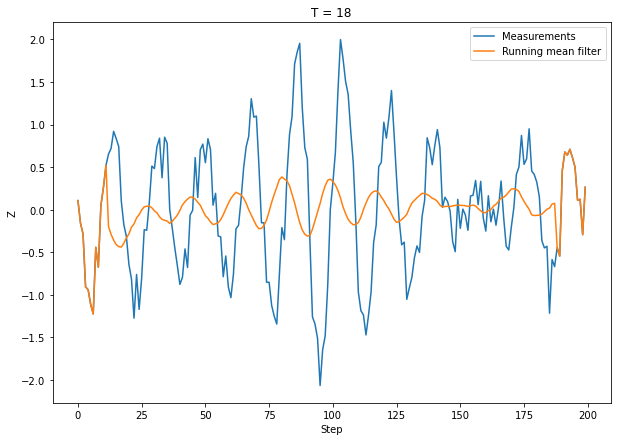

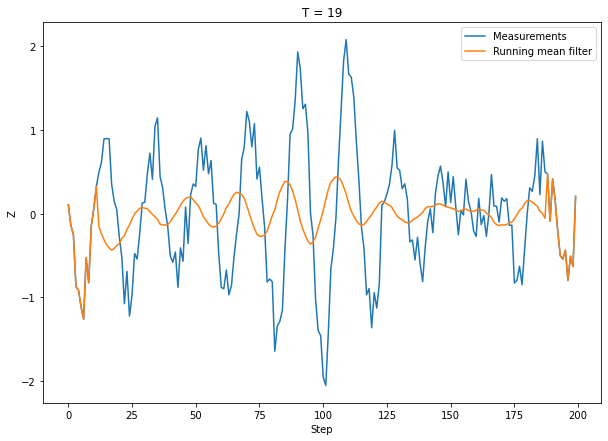

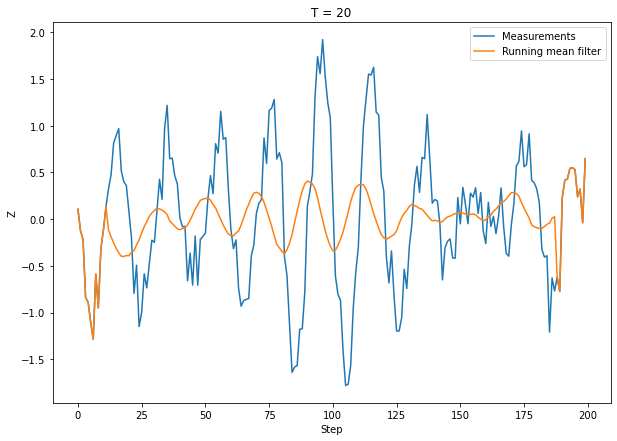

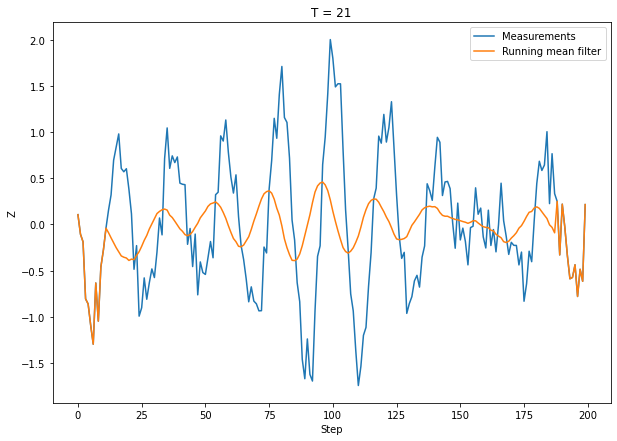

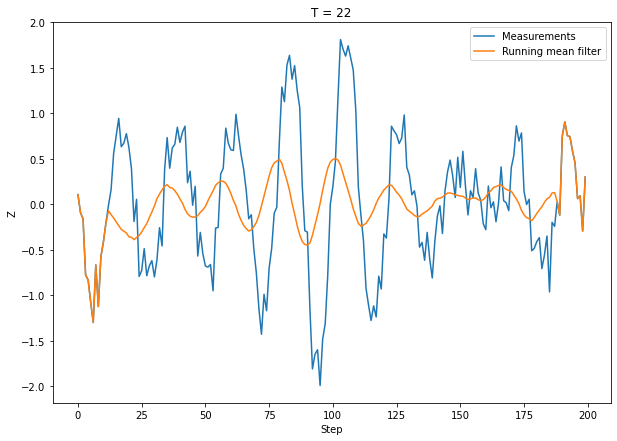

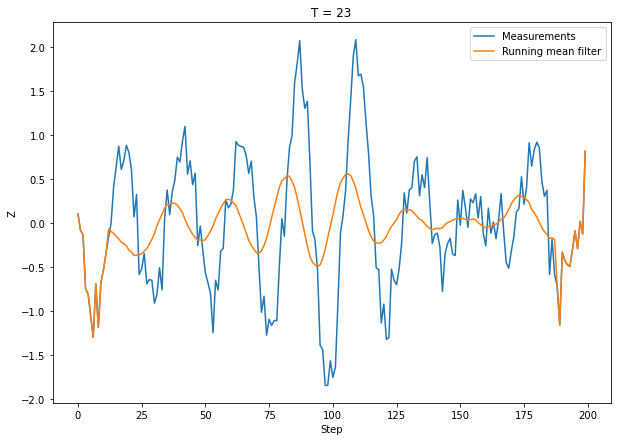

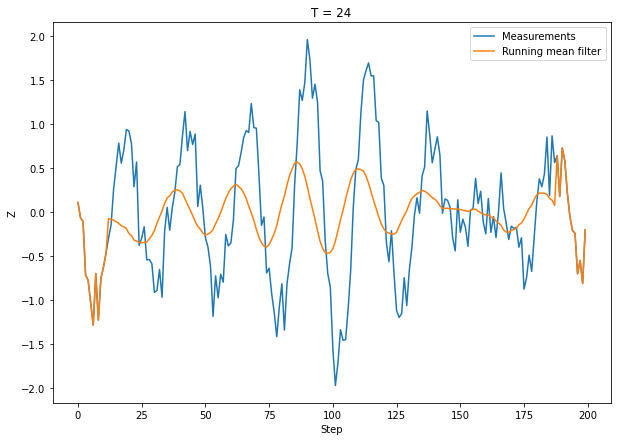

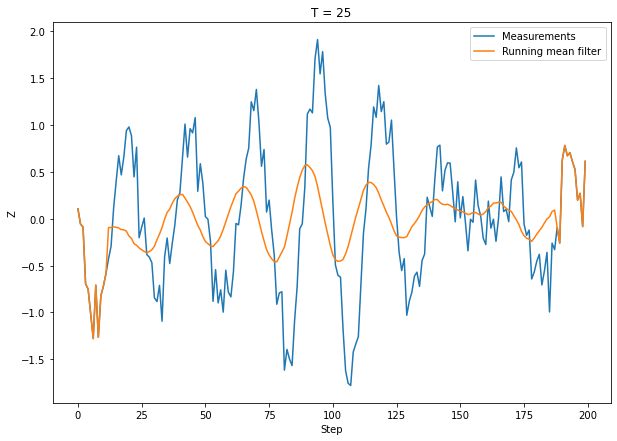

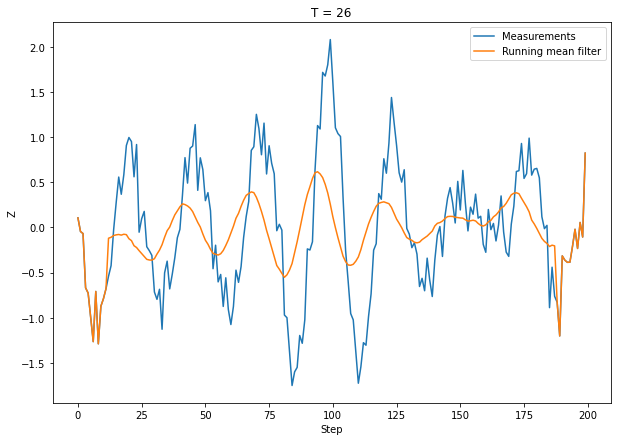

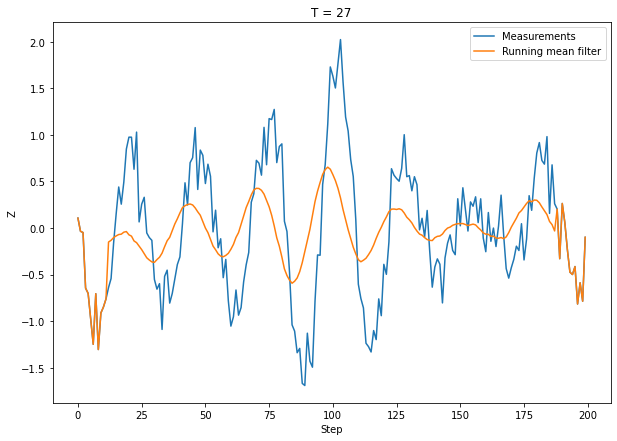

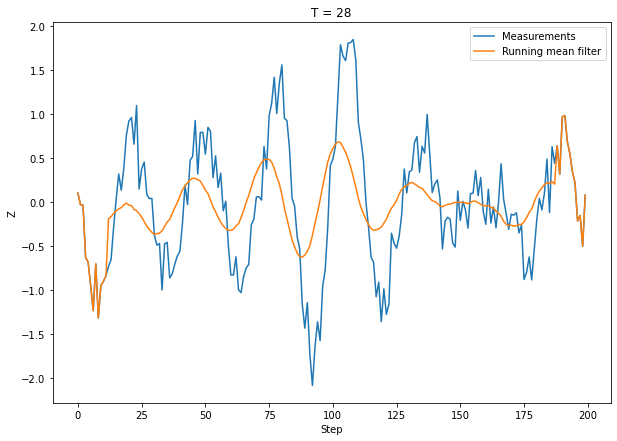

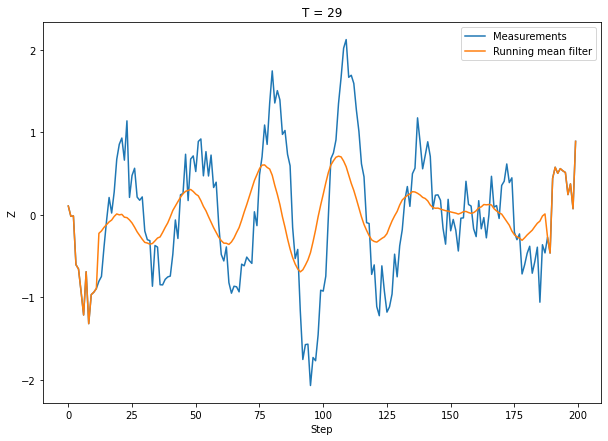

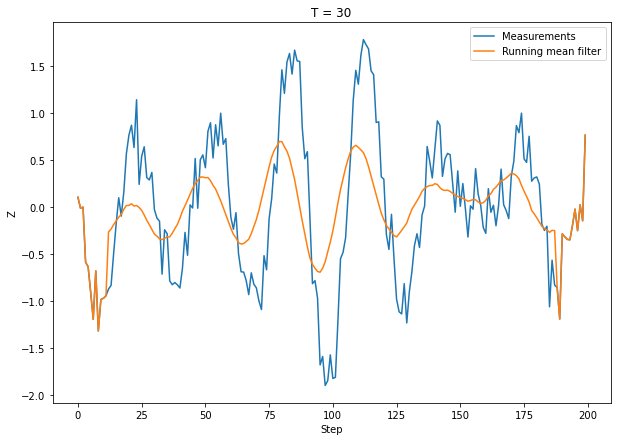

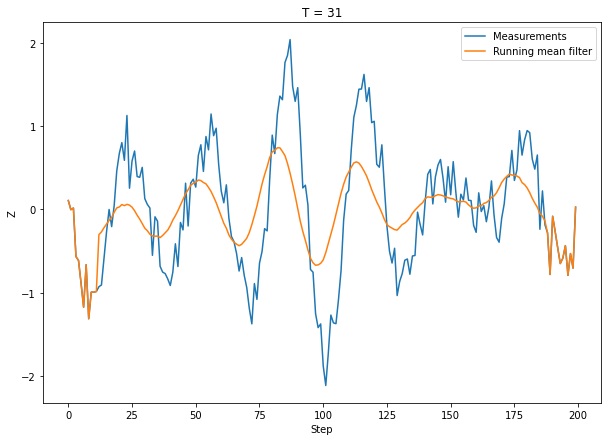

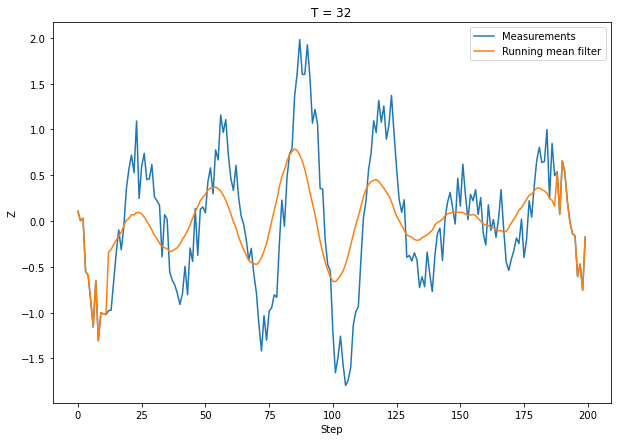

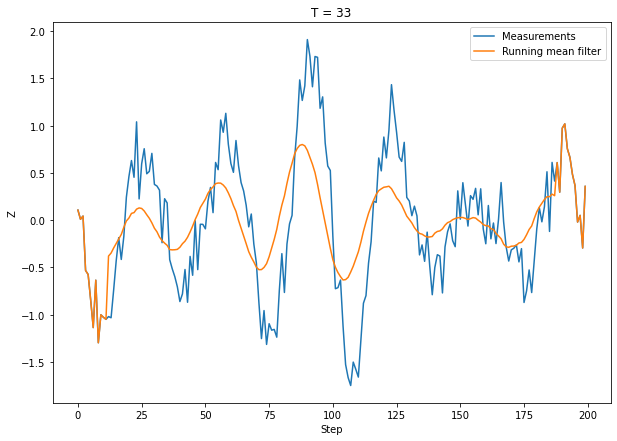

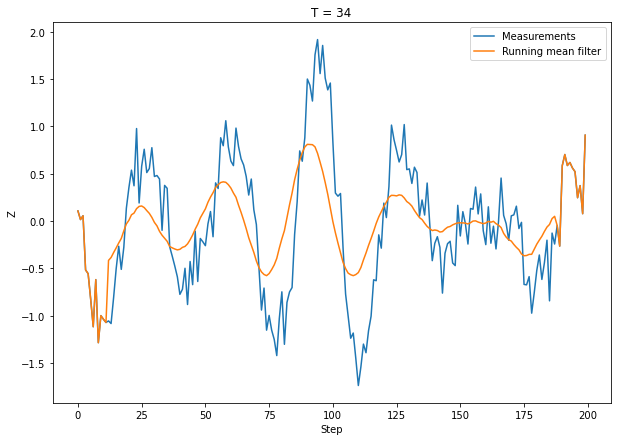

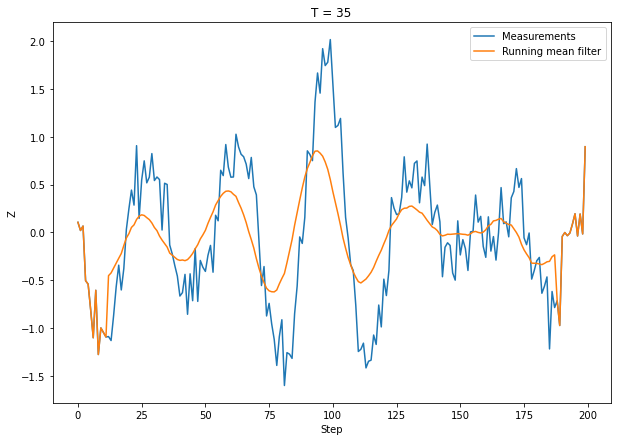

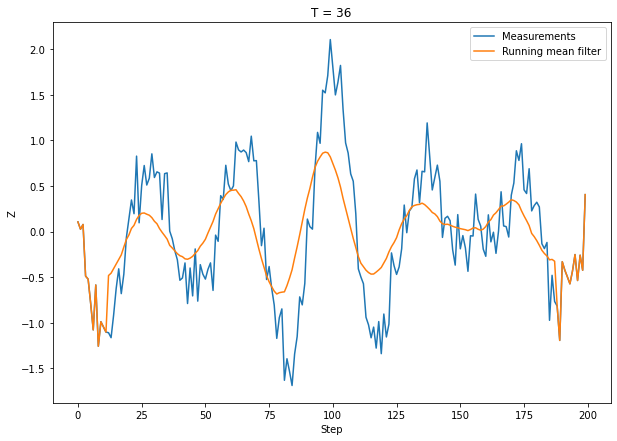

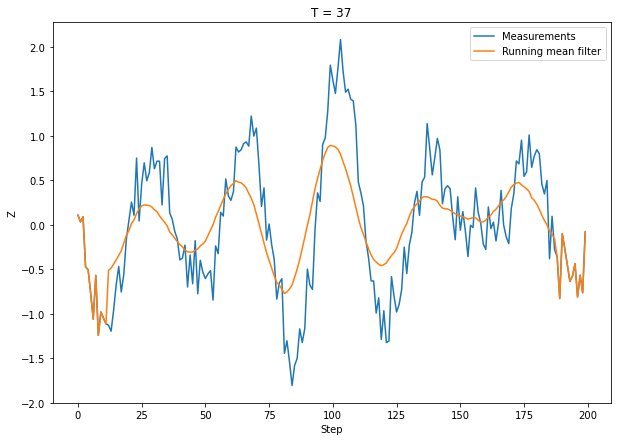

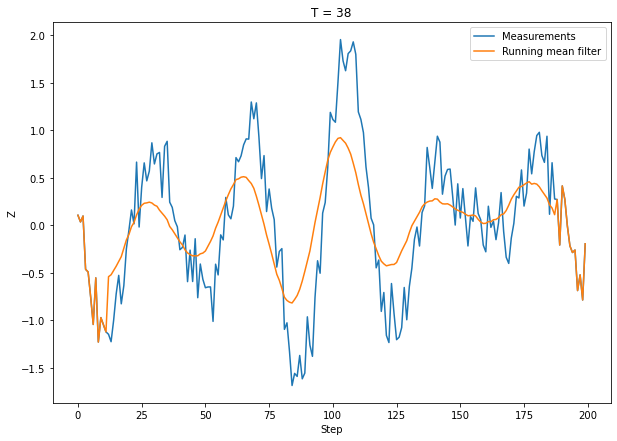

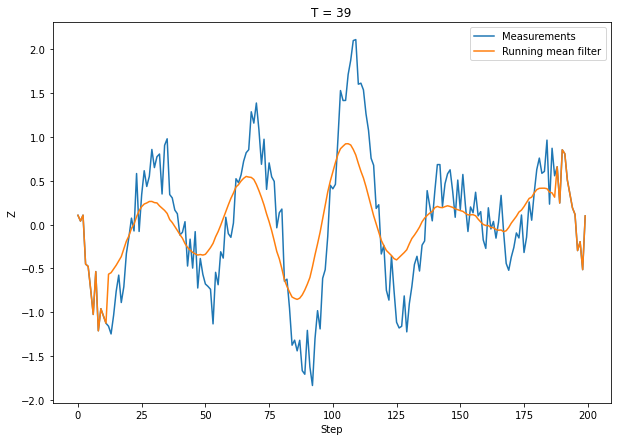

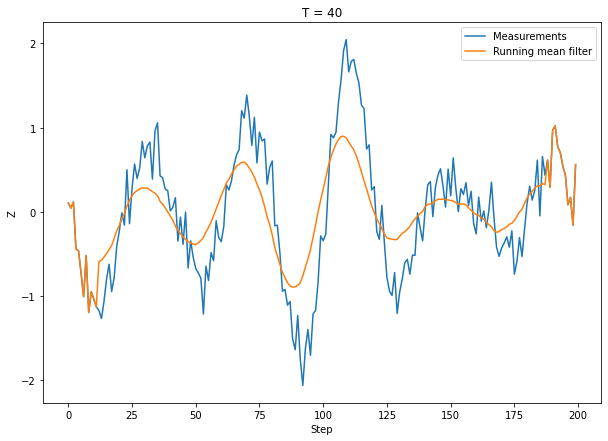

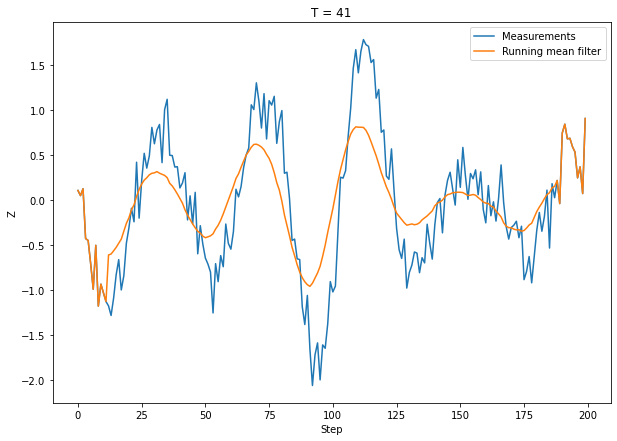

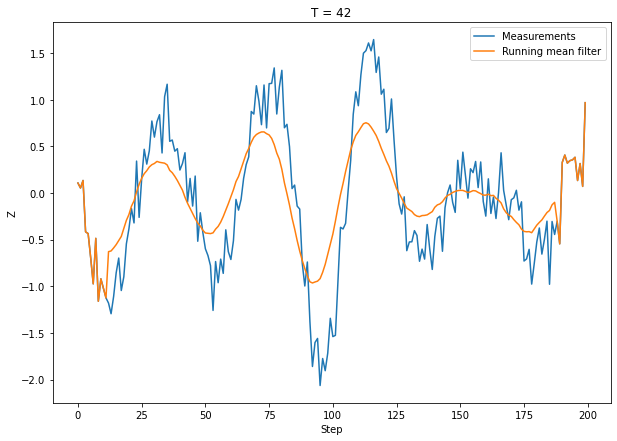

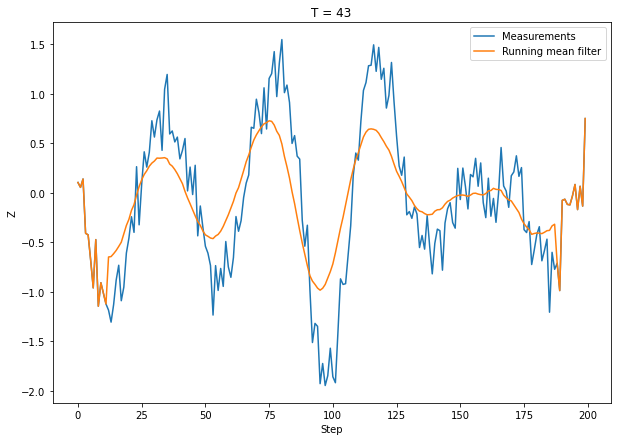

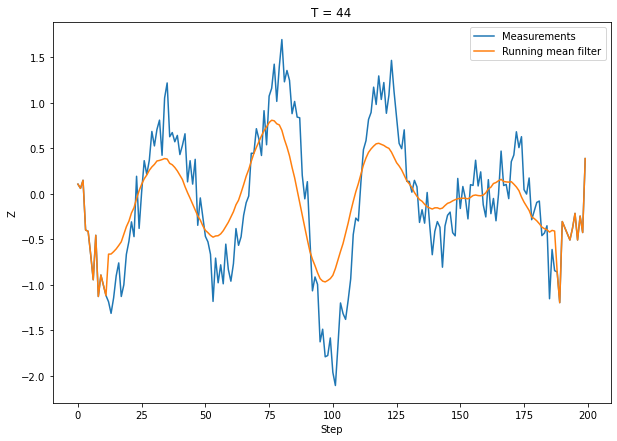

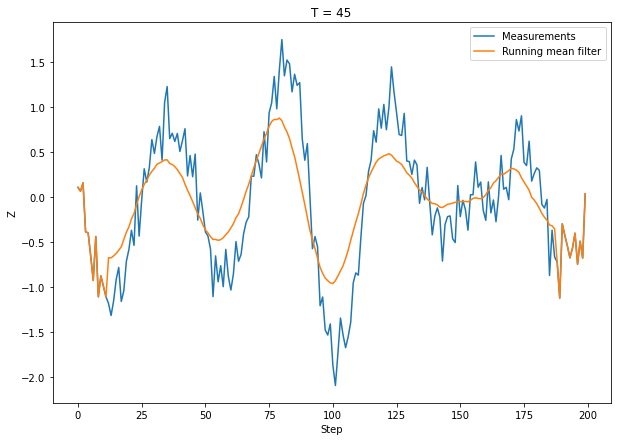

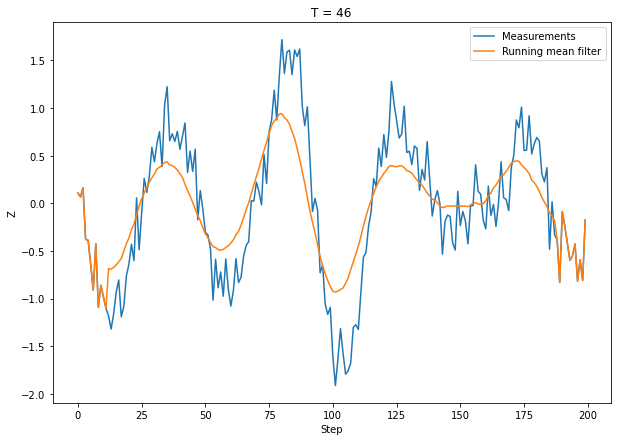

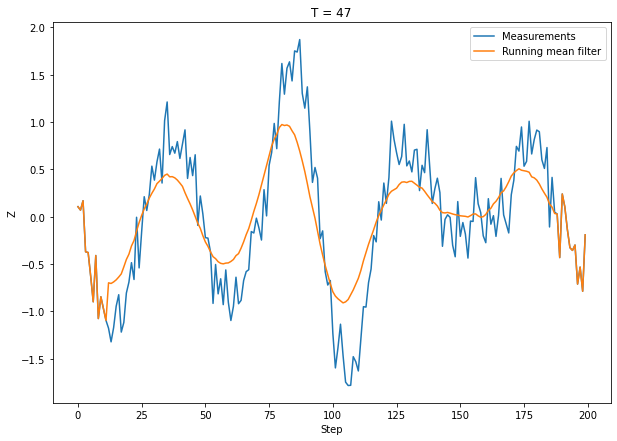

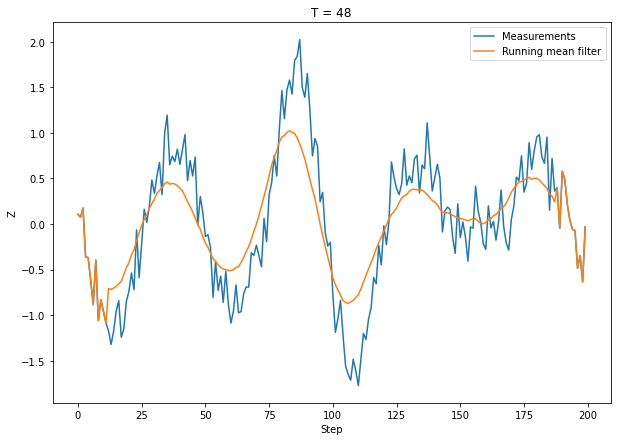

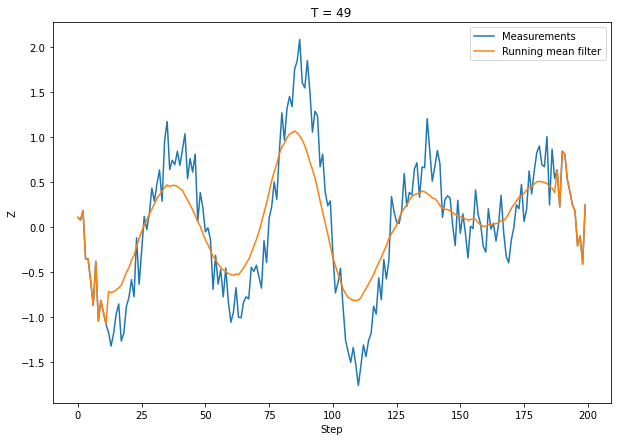

In [213]:
# Determining the period of oscillations with M = 25 for 
# a) inverse oscillations
# b) zero oscillations
# c) insignificant change of oscillations 

TT = np.arange(1,50,1)
for i in TT:
    T = i
    omeg = 2 * np.pi / T
    x_sin = np.zeros(200)
    for i in range(len(x_sin)):
        x_sin[i] = A[i] * np.sin(omeg * i + 3)
    z_sin = x_sin + nu_sin
    plt.figure(figsize=(10, 7))
    plt.plot(z_sin)
    plt.plot(mean_smooth(25, z_sin))
    plt.ylabel('Z')
    plt.xlabel('Step')
    plt.legend(['Measurements', 'Running mean filter'])
    plt.title( "T = " + str(T))
    plt.show()

In [ ]:
# a) T = 14 
# b) T = 4
# c) ?